<a href="https://colab.research.google.com/github/silviootero/Trabajo-de-Programacion-Lineal/blob/main/M%C3%A9todo_Simplex_revisado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ESTRUCTURA MEJOR ESTABLECIDA**

In [23]:
# Solicitar al usuario que ingrese los datos
def obtener_datos():
    num_variables = int(input("Ingrese el número de variables en la función objetivo: "))
    num_restricciones = int(input("Ingrese el número de restricciones: "))

    c = np.array([float(x) for x in input("Ingrese los coeficientes de la función objetivo separados por espacios: ").split()])
    A = np.array([[float(x) for x in input(f"Ingrese los coeficientes de la restricción {i+1} separados por espacios: ").split()] for i in range(num_restricciones)])
    b = np.array([float(x) for x in input("Ingrese los términos independientes de las restricciones separados por espacios: ").split()])

    return c, A, b

# Obtener los datos del usuario
c, A, b = obtener_datos()

Ingrese el número de variables en la función objetivo: 2
Ingrese el número de restricciones: 4
Ingrese los coeficientes de la función objetivo separados por espacios: 5 4
Ingrese los coeficientes de la restricción 1 separados por espacios: 6 4
Ingrese los coeficientes de la restricción 2 separados por espacios: 1 2
Ingrese los coeficientes de la restricción 3 separados por espacios: -1 1
Ingrese los coeficientes de la restricción 4 separados por espacios: 0 1
Ingrese los términos independientes de las restricciones separados por espacios: 24 6 1 2


In [13]:
import numpy as np

# Coeficientes de la función objetivo
c = np.array([3, 2])

# Matriz de coeficientes de las restricciones
A = np.array([[2, 1], [1, 2]])

# Términos independientes de las restricciones
b = np.array([4, 6])

In [30]:

def crear_matriz_simplex(A, b, c):
    """
    Crea la matriz simplex inicial a partir de los coeficientes de la función objetivo,
    las restricciones y las variables.

    Args:
        A: Matriz de coeficientes de las restricciones (m x n).
        b: Vector de términos independientes de las restricciones (m x 1).
        c: Vector de coeficientes de la función objetivo (n x 1).

    Returns:
        matriz_simplex: Matriz simplex inicial aumentada (m x n+m+1).
    """
    n = A.shape[1]  # Número de variables
    m = A.shape[0]  # Número de restricciones

    # Crea la matriz simplex aumentada con variables de holgura
    matriz_simplex = np.zeros((m + 1, n + m + 1))
    matriz_simplex[:m, :n] = A
    matriz_simplex[:m, n:n+m] = np.eye(m)
    matriz_simplex[:m, -1] = b
    matriz_simplex[-1, :n] = -c

    return matriz_simplex

In [31]:
def identificar_variable_pivote(matriz_simplex):
    """
    Identifica la variable de entrada básica que debe salir de la base y la variable
    de no-entrada básica que debe entrar.

    Args:
        matriz_simplex: Matriz simplex actual (m x n+1).

    Returns:
        var_entrada: Índice de la variable de entrada básica que debe salir de la base.
        var_no_entrada: Índice de la variable de no-entrada básica que debe entrar.
    """
    # Obtiene el índice de la columna con el costo reducido más negativo
    var_no_entrada = np.argmin(matriz_simplex[-1, :-1])

    # Si todos los costos reducidos son no negativos, ya se encontró la solución óptima
    if matriz_simplex[-1, var_no_entrada] >= 0:
        return None, None

    # Identifica la variable de entrada básica que debe salir de la base
    ratio_min = np.inf
    var_entrada = None
    for i in range(matriz_simplex.shape[0] - 1):
        if matriz_simplex[i, var_no_entrada] > 0:
            ratio = matriz_simplex[i, -1] / matriz_simplex[i, var_no_entrada]
            if ratio < ratio_min:
                ratio_min = ratio
                var_entrada = i

    return var_entrada, var_no_entrada

In [32]:
def verificar_optimalidad(matriz_simplex):
    """
    Verifica si la solución actual es óptima.

    Args:
        matriz_simplex: Matriz simplex actual (m x n+1).

    Returns:
        True si la solución es óptima, False en caso contrario.
    """
    # Si todos los costos reducidos son no negativos, ya se encontró la solución óptima
    if np.all(matriz_simplex[-1, :-1] >= 0):
        return True
    else:
        return False

In [33]:
def realizar_pivotacion(matriz_simplex, var_entrada, var_no_entrada):
    """
    Realiza la operación de pivotación en el método simplex.

    Args:
        matriz_simplex: Matriz simplex actual (m x n+1).
        var_entrada: Índice de la variable de entrada básica que debe salir de la base.
        var_no_entrada: Índice de la variable de no-entrada básica que debe entrar en la base.
    """
    # Normaliza la fila del pivote (divide la fila por el elemento pivote)
    matriz_simplex[var_entrada] /= matriz_simplex[var_entrada, var_no_entrada]

    # Elimina los demás elementos en la columna de la variable de entrada
    for i in range(matriz_simplex.shape[0]):
        if i != var_entrada:
            matriz_simplex[i] -= matriz_simplex[i, var_no_entrada] * matriz_simplex[var_entrada]

In [34]:
def mostrar_solucion(matriz_simplex):
    """
    Muestra la solución óptima del problema.

    Args:
        matriz_simplex: Matriz simplex final (m x n+1).
    """
    n = matriz_simplex.shape[1] - 1  # Número de columnas (sin contar b)
    m = matriz_simplex.shape[0] - 1  # Número de filas (sin contar la fila de costos)

    variables_basicas = []
    valores_basicos = []

    # Identificar las variables básicas y sus valores
    for j in range(n):
        columna = matriz_simplex[:m, j]
        if np.count_nonzero(columna) == 1 and np.isclose(np.max(columna), 1):
            fila = np.where(columna == 1)[0][0]
            variables_basicas.append(j)
            valores_basicos.append(matriz_simplex[fila, -1])

    # Mostrar la solución
    print("Variables básicas:", variables_basicas)
    print("Valores básicos:", valores_basicos)
    print("Valor óptimo de Z:", -matriz_simplex[-1, -1])

In [35]:
# Crear la matriz simplex inicial
matriz_simplex = crear_matriz_simplex(A, b, c)

# Lista para registrar los tableros simplex de cada iteración
tableros_simplex = []

# Ejecutar el método simplex revisado
while True:
    # Registrar el tablero actual
    tableros_simplex.append(matriz_simplex.copy())

    var_entrada, var_no_entrada = identificar_variable_pivote(matriz_simplex)

    if var_entrada is None:
        break

    realizar_pivotacion(matriz_simplex, var_entrada, var_no_entrada)

# Verificar la optimalidad
if verificar_optimalidad(matriz_simplex):
    print("Solución óptima encontrada.")
else:
    print("No se encontró una solución óptima.")

# Mostrar la solución óptima
mostrar_solucion(matriz_simplex)

# Mostrar todos los tableros simplex registrados
for i, tablero in enumerate(tableros_simplex):
    print(f"Tablero simplex de la iteración {i}:")
    print(tablero)

Solución óptima encontrada.
Variables básicas: [0, 1, 4, 5]
Valores básicos: [3.0, 1.4999999999999998, 2.5000000000000004, 0.5000000000000002]
Valor óptimo de Z: -21.0
Tablero simplex de la iteración 0:
[[ 6.  4.  1.  0.  0.  0. 24.]
 [ 1.  2.  0.  1.  0.  0.  6.]
 [-1.  1.  0.  0.  1.  0.  1.]
 [ 0.  1.  0.  0.  0.  1.  2.]
 [-5. -4.  0.  0.  0.  0.  0.]]
Tablero simplex de la iteración 1:
[[ 1.          0.66666667  0.16666667  0.          0.          0.
   4.        ]
 [ 0.          1.33333333 -0.16666667  1.          0.          0.
   2.        ]
 [ 0.          1.66666667  0.16666667  0.          1.          0.
   5.        ]
 [ 0.          1.          0.          0.          0.          1.
   2.        ]
 [ 0.         -0.66666667  0.83333333  0.          0.          0.
  20.        ]]
Tablero simplex de la iteración 2:
[[ 1.     0.     0.25  -0.5    0.     0.     3.   ]
 [ 0.     1.    -0.125  0.75   0.     0.     1.5  ]
 [ 0.     0.     0.375 -1.25   1.     0.     2.5  ]
 [ 0.    

**MÉTODO GRÁFICO**

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations

def get_intersections(A, b):
    points = []
    num_constraints = len(A)

    for i, j in combinations(range(num_constraints), 2):
        A_sub = np.array([A[i], A[j]])
        b_sub = np.array([b[i], b[j]])
        try:
            point = np.linalg.solve(A_sub, b_sub)
            if all(point >= 0):  # Feasibility check: point must be non-negative
                points.append(point)
        except np.linalg.LinAlgError:
            continue
    return np.array(points)

def is_feasible(point, A, b):
    return np.all(A @ point <= b)

def evaluate_objective(points, c):
    return points @ c

def find_optimal_point(points, c, maximize=True):
    values = evaluate_objective(points, c)
    if maximize:
        optimal_index = np.argmax(values)
    else:
        optimal_index = np.argmin(values)
    return points[optimal_index], values[optimal_index]

def plot_feasible_region(A, b, intersection_points, optimal_point=None, x_limits=(0, 10), y_limits=(0, 10)):
    fig, ax = plt.subplots()

    x = np.linspace(x_limits[0], x_limits[1], 400)

    for i in range(len(A)):
        if A[i][0] != 0 and A[i][1] != 0:
            y = (b[i] - A[i][0] * x) / A[i][1]
            ax.plot(x, y, label=f"Restriccion {A[i][0]}x + {A[i][1]}y = {b[i]}")

        elif A[i][0] == 0:
            y = np.full_like(x, b[i] / A[i][1])
            ax.plot(x, y, label=f"Restriccion y = { b[i] / A[i][1]}")

        elif A[i][1] == 0:
            xAlt = np.full_like(x, b[i] / A[i][0])
            yAlt = np.linspace(y_limits[0], y_limits[1], 400)
            ax.plot(xAlt, yAlt, label=f"Restriccion x = {b[i] / A[i][0]}")


    # Plot the feasible region
    feasible_points = np.array([p for p in intersection_points if is_feasible(p, A, b)])
    if feasible_points.size > 0:
        ax.scatter(feasible_points[:, 0], feasible_points[:, 1], color='green', label='Puntos Factibles')

    if optimal_point is not None:
        ax.scatter(optimal_point[0], optimal_point[1], color='red', label='Punto Optimo', zorder=5)


    plotting_obj_function(x, ax, optimal_point, 18)
    plt.xlim(x_limits)
    plt.ylim(y_limits)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.legend()
    plt.grid(True)
    plt.title('Metodo grafico de la formula objetivo')
    plt.show()

def plotting_obj_function(x, ax, optimal_point, calibrator, maximize=True, cambio=0.5):
  if maximize:
    z = (calibrator - c[0] * x) / c[1]
  else:
    z = (calibrator + c[0] * x) / c[1]

  while True:
    if maximize:
      ax.plot(x, z, color="black")
      z = z + cambio
      if np.all(z > np.min(optimal_point)):
          break

    else:
      z = z - cambio
      ax.plot(x, z, color="black")
      if np.all(z < np.max(optimal_point)):
          break



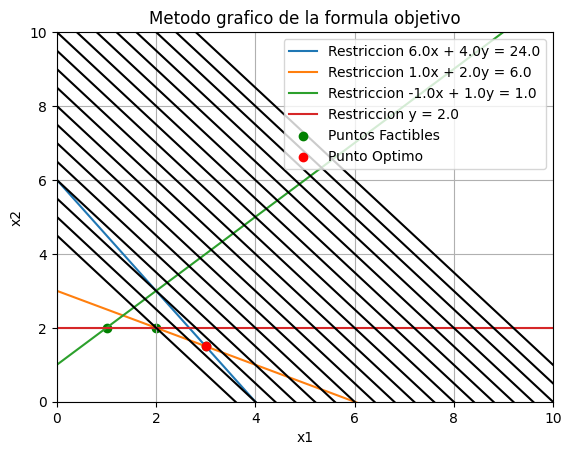

El punto optimo encontrado, antes de salir de la region factible se encuentra en: [3.  1.5]
El valor optimo obtenido despues de reemplazar los valores es: 21.0


In [42]:
if len(c) == 2:
 intersection_points = get_intersections(A, b)

 if intersection_points.size == 0:
     print("No se encontro solucion factible.")
 else:
     feasible_points = np.array([p for p in intersection_points if is_feasible(p, A, b)])
     if feasible_points.size == 0:
         print("No se encontraron soluciones factibles.")
     else:
         optimal_point, optimal_value = find_optimal_point(feasible_points, c, maximize=True)
         plot_feasible_region(A, b, feasible_points, optimal_point, x_limits=(0, 10), y_limits=(0, 10))
         print("El punto optimo encontrado, antes de salir de la region factible se encuentra en:", optimal_point)
         print("El valor optimo obtenido despues de reemplazar los valores es:", optimal_value)


**ANÁLISIS DE SENSIBILIDAD**

In [44]:
def metodo_simplex(A, b, c):
    matriz_simplex = crear_matriz_simplex(A, b, c)
    while True:
        var_entrada, var_no_entrada = identificar_variable_pivote(matriz_simplex)
        if var_entrada is None:
            break
        realizar_pivotacion(matriz_simplex, var_entrada, var_no_entrada)
    return matriz_simplex


# Rango de variación del coeficiente de la primera variable
coeficientes_variados = np.linspace(3, 7, 5)

# Lista para almacenar los resultados
resultados = []

# Ejecutar el método simplex para cada coeficiente variado
for coef_variado in coeficientes_variados:
    c_variado = np.array([coef_variado, 4])  # Modificar solo el primer coeficiente
    matriz_simplex = metodo_simplex(A, b, c_variado)
    valor_optimo_z = -matriz_simplex[-1, -1]  # El valor de Z es el opuesto del valor en la tabla
    variables_basicas = []
    for i in range(len(A)):
        fila_i = matriz_simplex[i, :]
        indice_variable = np.nonzero(fila_i)[0][0]
        variables_basicas.append((indice_variable, fila_i[-1]))
    resultados.append({
        "Coeficiente Variado": coef_variado,
        "Variables Básicas": variables_basicas,
        "Valor Óptimo de Z": valor_optimo_z
    })

# Mostrar los resultados en una tabla
print("Tabla de Análisis de Sensibilidad:")
print("Coeficiente Variado | Variables Básicas | Valor Óptimo de Z")
for resultado in resultados:
    print("{:.2f} | {} | {:.2f}".format(
        resultado["Coeficiente Variado"],
        resultado["Variables Básicas"],
        resultado["Valor Óptimo de Z"]
    ))

Tabla de Análisis de Sensibilidad:
Coeficiente Variado | Variables Básicas | Valor Óptimo de Z
3.00 | [(2, 0.5), (2, 2.5), (1, 1.5), (0, 3.0)] | -15.00
4.00 | [(0, 3.0), (1, 1.4999999999999998), (2, 2.5000000000000004), (2, 0.5000000000000002)] | -18.00
5.00 | [(0, 3.0), (1, 1.4999999999999998), (2, 2.5000000000000004), (2, 0.5000000000000002)] | -21.00
6.00 | [(0, 4.0), (1, 2.0), (1, 5.0), (1, 2.0)] | -24.00
7.00 | [(0, 4.0), (1, 2.0), (1, 5.0), (1, 2.0)] | -28.00
